In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('census - census.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df=df[df['native.country']!='?']

In [14]:
df


,age,workclass,education,education.num,occupation,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,Bachelors,13,Adm-clerical,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Handlers-cleaners,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Handlers-cleaners,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Prof-specialty,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Exec-managerial,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Other-service,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Exec-managerial,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Prof-specialty,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Exec-managerial,White,Male,5178,0,40,United-States,>50K


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le=LabelEncoder()

In [17]:
df.columns

Index(['age', 'workclass', 'education', 'education.num', 'occupation', 'race',
       'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country', 'income'],
      dtype='object')

In [20]:
l=['workclass','education','occupation','race','sex','native.country','income']

for i in l:
    df[i]=le.fit_transform(df[i])

<Figure size 432x288 with 0 Axes>

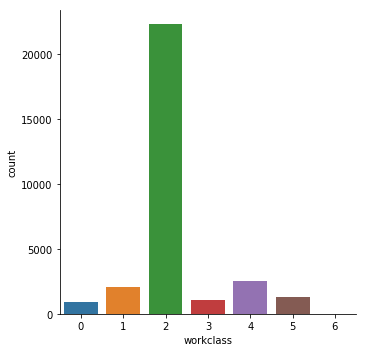

In [38]:
plt.figure(0)
sns.catplot('workclass',data=df,kind='count')

In [22]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [23]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [25]:
lr.fit(x_train,y_train)

C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
y_pred=lr.predict(x_test)

In [27]:
pd.DataFrame({'Actual':list(y_test),'Predicted':list(y_pred)})

,Actual,Predicted
0,[1],1
1,[0],0
2,[1],0
3,[0],0
4,[0],0
5,[1],0
6,[0],0
7,[0],0
8,[0],0
9,[0],0


In [28]:
lr.score(x_train,y_train)

0.8185478141429451

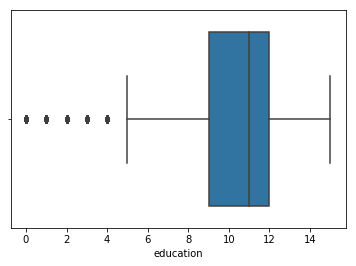

In [37]:
plt.figure(0)
sns.boxplot(x=df['education'])

<Figure size 432x288 with 0 Axes>

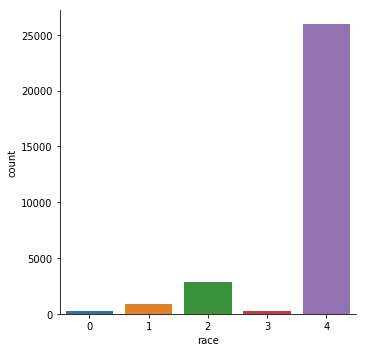

In [36]:
plt.figure(0)
sns.catplot('workclass',data=df,kind='count')